# Stochastic Gradient Descent

The purpose of this notebook is to practice implementing the stochastic gradient descent (SGD) optimisation algorithm from scratch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Imports used for testing.
import numpy.testing as npt

We consider a linear regression problem of the form
$$
y = \beta_0 +  x \beta_1 + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
where $x\in\mathbb{R}$ are inputs and $y\in\mathbb{R}$ are noisy observations. The bias $\beta_0\in\mathbb{R}$ and coefficient $\beta_1\in\mathbb{R}$ parametrize the function.

In this tutorial, we assume that we are able to sample data inputs and outputs $(\boldsymbol x_n, y_n)$, $n=1,\ldots, K$, and we are interested in finding parameters $\beta_0$ and  $\beta_1$ that map the inputs well to the ouputs.

From our lectures, we know that the parameters $\beta_0$ and $\beta_1$ can be calculated analytically. However, here we are interested in computing a numerical solution using the stochastic gradient descent algorithm (SGD).

We will start by setting up a generator of synthetic data inputs and outputs, see: https://realpython.com/introduction-to-python-generators/.

In [2]:
# define parameters for synthetic data
true_beta0 = 3.7
true_beta1 = -1.8
sigma = 0.5
xlim = [-3, 3]

def data_generator(batch_size, seed=0):
    """Generator function for synthetic data.
    
    Parameters:
    batch_size (int): Batch size for generated data
    seed (float): Seed for random numbers epsilon

    Returns:
    x (np.array): Synthetic feature data
    y (np.array): Synthetic target data following y=true_beta0 + x^T true_beta + epsilon
    """
    # fix seed for random numbers
    np.random.seed(seed)

    while True:
        # generate random input data
        x = np.random.uniform(*xlim, (batch_size, 1))
        # generate noise
        noise = np.random.randn(batch_size, 1) * sigma
        # compute noisy targets
        y = true_beta0 + x * true_beta1 + noise
        yield x, y

In [3]:
# Create generator for batch size 16
train_data = data_generator(batch_size=16)
print(train_data)

<generator object data_generator at 0x10ea8af40>


We can visualise the first batch of synthetic data along with the true underlying function.

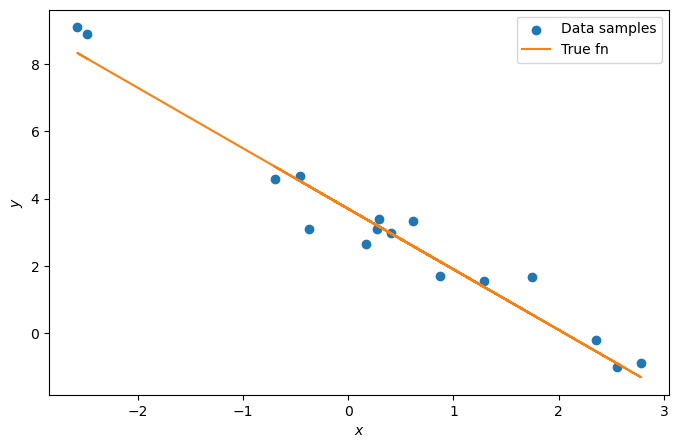

In [4]:
# Pull a batch of training data
x_sample, y_sample = next(train_data)

# Plot training data along true underlying function
plt.figure(figsize=(8, 5))
plt.scatter(x_sample, y_sample, label='Data samples')
plt.plot(x_sample, true_beta0 + x_sample * true_beta1, color='C1', label='True fn')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

The loss that we wish to minimise is the expected mean squared error (MSE) loss computed on the training data:

$$
\mathcal{L}(\beta_0, \beta_1) := \mathbb{E}_{(x, y)\sim p_{data}} \left[(y - \beta_0 - x\beta_1)^2\right]
$$

We first compute the mean squared error loss on a single batch of input and output data.

In [5]:
## EDIT THIS FUNCTION
def mse_loss(x, y, beta0, beta1):
    """Computed expected MSE loss for a single batch.

    Parameters:
    x (np.array): K x 1 array of inputs
    y (np.array): K x 1 array of outputs
    beta0 (float): Bias parameter
    beta (float): Coefficient

    Returns:
    MSE (float): computed on this batch of inputs and outputs; K x 1 array
    """
    # compute expected MSE loss
    loss = np.mean(((y - beta0 - x * beta1)**2)) ## <-- SOLUTION
    return loss

To check your implementation you can run this test:

In [10]:
# This line verifies the correctness of the mse_loss implementation
npt.assert_allclose(mse_loss(x_sample,y_sample,1.0,-0.5), 9.311906)

Before we can minimze the MSE loss we need to initialise the parameters $\beta_0$ and $\beta_1$.

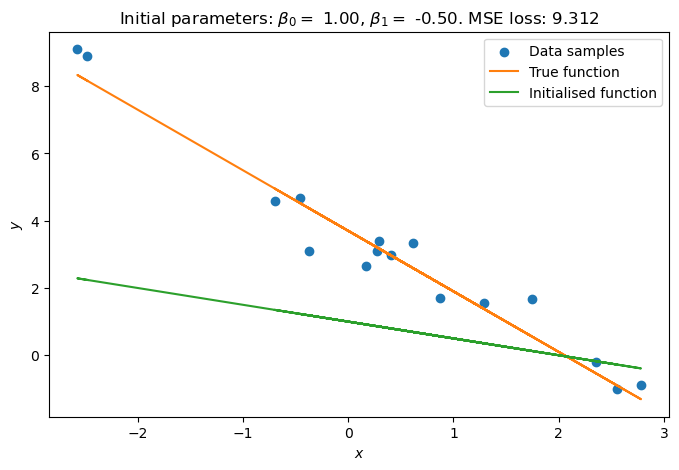

In [11]:
# Initialise the parameters
beta0 = 1.0
beta1 = -0.5

# Plot the initialised regression function
plt.figure(figsize=(8, 5))
plt.scatter(x_sample, y_sample, label='Data samples')
plt.plot(x_sample, true_beta0 + x_sample * true_beta1, color='C1', label='True function')
plt.plot(x_sample, beta0 + x_sample * beta1, color='C2', label='Initialised function')
plt.title(r'Initial parameters: $\beta_0=$ {:.2f}, $\beta_1=$ {:.2f}. MSE loss: {:.3f}'.format(
    np.squeeze(beta0), np.squeeze(beta1), mse_loss(x_sample, y_sample, beta0, beta1))
         )
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

Stochastic gradient descent samples a batch of $K$ input and output samples, and makes a parameter update by  computing the gradient of the loss function

$$
\nabla_{(\beta_0, \beta_1)}\mathcal{L}(\beta_0^{(i)}, \beta_1^{(i)} \mid \mathcal{X}^{(i)}, \mathcal{Y}^{(i)}),
$$

where $\beta_0^{(i)}, \beta_1^{(i)}$ are the values of the parameters at the $i$-th iteration of the algorithm, and $\mathcal{X}^{(i)}, \mathcal{Y}^{(i)}$ are the $i$-th batch of inputs and outputs.

The following function should compute the gradient of the MSE loss for a given batch of data, and current parameter values.

In [12]:
## EDIT THIS FUNCTION
def mse_grad(x, y, beta0, beta1):
    """Compute gradient of MSE loss w.r.t. beta0 and beta1 averaged over batch.

    Parametes:
    x (np.array): K x 1 array of inputs
    y (np.array): K x 1 array of outputs
    beta0 (float): Bias parameter
    beta1 (float): Coefficient

    Returns:
    delta_beta0 (float): Partial derivative w.r.t. beta_0 averaged over batch
    delta_beta1 (float): Partial derivative w.r.t. beta_1 averaged over batch
    """

    # compute partial derivative w.r.t. beta_0
    delta_beta0 = - 2 * np.mean(y - beta0 - x * beta1) ## <-- SOLUTION

    # compute partial derivative w.r.t. beta_1
    delta_beta1 = - 2 * np.mean((y - beta0 - x * beta1) * x) ## <-- SOLUTION

    return delta_beta0, delta_beta1

To check your implementation you can run this cell:

In [13]:
# These lines verify that the derivatives delta_beta0 and delta_beta1 are computed correctled
delta_beta0, delta_beta1 = mse_grad(x_sample, y_sample, 1.0, -0.5)
npt.assert_allclose(delta_beta0, -4.51219)
npt.assert_allclose(delta_beta1, 4.047721)

We have now established all ingredients needed to implement the SGD algorithm for our problem task.

Recall that SGD makes the following parameter update at each iteration:

$$
(\beta_0^{(i+1)}, \beta_1^{(i+1)}) = (\beta_0^{(i)}, \beta_1^{(i)}) - \eta \nabla_{(\beta_0, \beta_1)}\mathcal{L}(\beta_0^{(i)}, \beta_1^{(i)} \mid \mathcal{X}^{(i)}, \mathcal{Y}^{(i)}),
$$

where $\eta>0$ is the learning rate.

Implement below a training of the parameters $\beta_0$ and $\beta_1$ using SGD over 2000 iterations and a learning rate $\eta=0.001$.

In [15]:
## EDIT THIS CELL

# parameters for SGD
iterations = 2000
losses = []
learning_rate = 0.001

## SOLUTION
for iteration in range(iterations):
    # get a new batch of training data at every iteration
    x_batch, y_batch = next(train_data)
    # compute MSE loss
    losses.append(mse_loss(x_batch, y_batch, beta0, beta1))
    # compute gradient
    delta_beta0, delta_beta1 = mse_grad(x_batch, y_batch, beta0, beta1)
    # update parameters
    beta0 -= learning_rate * delta_beta0
    beta1 -= learning_rate * delta_beta1

# report results
print('Learned parameters:')
print('beta0 =', np.around(beta0,2), "\nbeta1 =", np.around(beta1,2))
print('\nTrue parameters:')
print('beta0 =', true_beta0, "\nbeta1 =", true_beta1)

Learned parameters:
beta0 = 3.71 
beta1 = -1.8

True parameters:
beta0 = 3.7 
beta1 = -1.8


We finally plot the fitted curve and the visualise the training over several iterations.

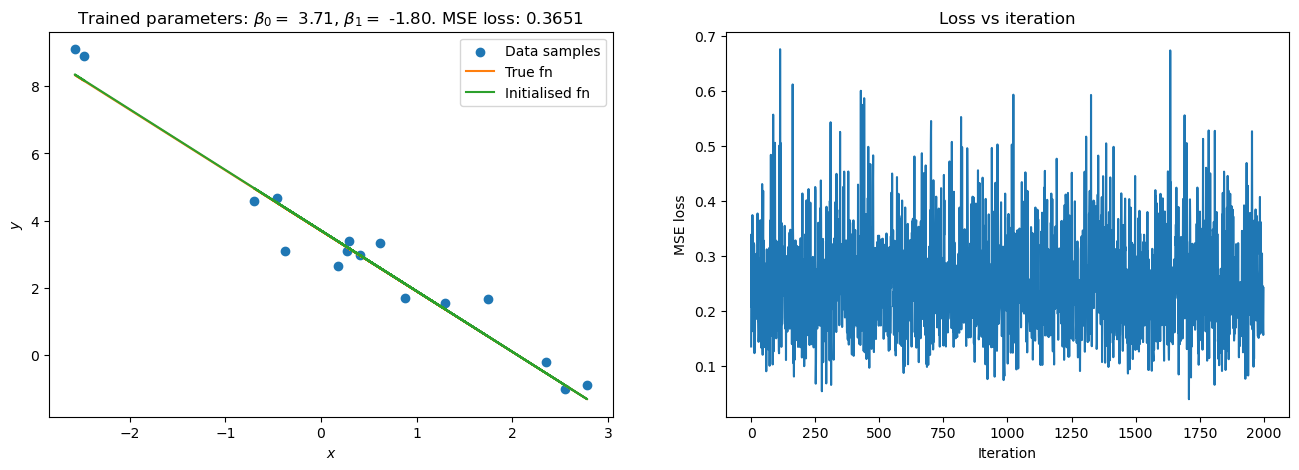

In [16]:
# Plot the learned regression function and loss values
fig = plt.figure(figsize=(16, 5))
fig.add_subplot(121)
plt.scatter(x_sample, y_sample, label='Data samples')
plt.plot(x_sample, true_beta0 + x_sample * true_beta1, color='C1', label='True fn')
plt.plot(x_sample, beta0 + x_sample * beta1, color='C2', label='Initialised fn')
plt.title(r'Trained parameters: $\beta_0=$ {:.2f}, $\beta_1=$ {:.2f}. MSE loss: {:.4f}'.format(
    np.squeeze(beta0), np.squeeze(beta1), mse_loss(x_sample, y_sample, beta0, beta1))
         )
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()

fig.add_subplot(122)
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("MSE loss")
plt.title("Loss vs iteration")
plt.show()

#### Questions
1. Does the solution above look reasonable?
2. Play around with different values of the learning rate. How is the convergence of the algorithm affected?
3. Try using different batch sizes and re-run the algorithm. What changes?